In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('tested.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
cat_cols = ['Survived','Pclass','Sex','SibSp','Parch','Cabin','Embarked']
num_cols = ['Age','Fare']

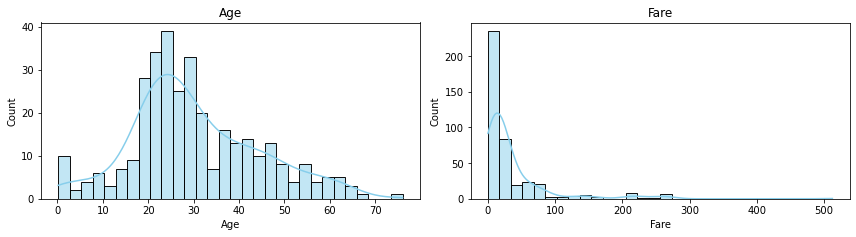

In [11]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, len(num_cols)//2 + 1, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

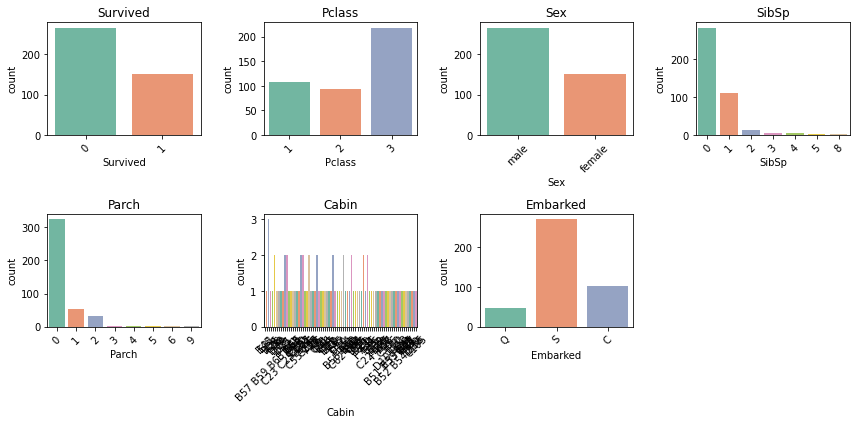

In [12]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, len(cat_cols)//2 + 1, i)
    sns.countplot(x=df[col], palette="Set2")
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Null values Treatment

In [13]:
df['Age'].fillna(round(df['Age'].mean()), inplace=True)

In [14]:
df['Fare'].fillna(round(df['Fare'].mean()), inplace=True)

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [16]:
df['Cabin'] = df.groupby('Pclass')['Cabin'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Encoding

In [18]:
df['Cabin']=df['Cabin'].astype(str).str[0]

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,F,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,F,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,F,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,F,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,F,S


#### Let's drop the name and id column as it is column swith all unique values

In [20]:
df.drop(columns=['PassengerId','Name'],inplace=True)

In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,F,Q
1,1,3,female,47.0,1,0,363272,7.0000,F,S
2,0,2,male,62.0,0,0,240276,9.6875,F,Q
3,0,3,male,27.0,0,0,315154,8.6625,F,S
4,1,3,female,22.0,1,1,3101298,12.2875,F,S


In [22]:
df = pd.get_dummies(df, columns=['Sex', 'Cabin', 'Embarked'], drop_first=True)

In [23]:
df.nunique()

Survived        2
Pclass          3
Age            79
SibSp           7
Parch           8
Ticket        363
Fare          170
Sex_male        2
Cabin_B         2
Cabin_C         2
Cabin_D         2
Cabin_E         2
Cabin_F         2
Cabin_G         2
Embarked_Q      2
Embarked_S      2
dtype: int64

#### Since people with same ticket id means they are travelling together lets groupby

In [24]:
df['GroupSize'] = df.groupby('Ticket')['Ticket'].transform('count')

In [25]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Embarked_Q,Embarked_S,GroupSize
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,30.216507,0.447368,0.392344,35.628080,0.636364,0.107656,0.083732,0.031100,0.021531,0.736842,0.002392,0.110048,0.645933,1.349282
std,0.481622,0.841838,12.635016,0.896760,0.981429,55.840503,0.481622,0.310316,0.277317,0.173797,0.145320,0.440875,0.048912,0.313324,0.478803,0.757069
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [26]:
df.drop(columns='Ticket',inplace=True)

In [27]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Embarked_Q,Embarked_S,GroupSize
0,0,3,34.5,0,0,7.8292,1,0,0,0,0,1,0,1,0,1
1,1,3,47.0,1,0,7.0000,0,0,0,0,0,1,0,0,1,1
2,0,2,62.0,0,0,9.6875,1,0,0,0,0,1,0,1,0,1
3,0,3,27.0,0,0,8.6625,1,0,0,0,0,1,0,0,1,1
4,1,3,22.0,1,1,12.2875,0,0,0,0,0,1,0,0,1,1


### Scaling

In [28]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df[['Age']])

In [29]:
df['Fare_log'] = np.log1p(df['Fare'])
scaler = MinMaxScaler()
df['Fare_scaled'] = scaler.fit_transform(df[['Fare_log']])

In [30]:
df.drop(columns=['Age','Fare','Fare_log'],inplace=True)

#### Import Libraries

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE

### Split dataset

In [32]:
# Define Features (X) and Target (y)
X = df.drop(columns=['Survived'])
y = df['Survived']

##### Smote

In [33]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

##### Split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

### ML MODEL Deployment

In [35]:
# Models Dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

C:\Users\raj50\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [36]:
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [37]:
for name, model in models.items():
    print(f"Training {name}...")

    if name == "Logistic Regression":
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results = results.append({'Model': name, 'Accuracy': accuracy, 
                              'Precision': precision, 'Recall': recall, 'F1-Score': f1}, 
                             ignore_index=True)

C:\Users\raj50\AppData\Local\Temp\ipykernel_22016\2135807352.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': name, 'Accuracy': accuracy,
C:\Users\raj50\AppData\Local\Temp\ipykernel_22016\2135807352.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': name, 'Accuracy': accuracy,


Training Logistic Regression...
Training Decision Tree...
Training Random Forest...


C:\Users\raj50\AppData\Local\Temp\ipykernel_22016\2135807352.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': name, 'Accuracy': accuracy,


Training Gradient Boosting...
Training AdaBoost...
Training XGBoost...


C:\Users\raj50\AppData\Local\Temp\ipykernel_22016\2135807352.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': name, 'Accuracy': accuracy,
C:\Users\raj50\AppData\Local\Temp\ipykernel_22016\2135807352.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': name, 'Accuracy': accuracy,
C:\Users\raj50\AppData\Local\Temp\ipykernel_22016\2135807352.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': name, 'Accuracy': accuracy,


In [38]:
print("\nFinal Model Performance Comparison:")
print(results)


Final Model Performance Comparison:
                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression       1.0        1.0     1.0       1.0
1        Decision Tree       1.0        1.0     1.0       1.0
2        Random Forest       1.0        1.0     1.0       1.0
3    Gradient Boosting       1.0        1.0     1.0       1.0
4             AdaBoost       1.0        1.0     1.0       1.0
5              XGBoost       1.0        1.0     1.0       1.0


### Trying double split

#### 1st split

In [39]:
X_train_full, X_test_final, y_train_full, y_test_final = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

#### 2nd split

In [40]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.3, random_state=42, stratify=y_train_full
)

### Final Model

In [41]:
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.5, max_iter=500, penalty='elasticnet',
                   solver='saga')

In [42]:
y_test_pred = model.predict(X_test_final)

In [43]:
print("\nClassification Report on Final Test Set:")
print(classification_report(y_test_final,y_test_pred))


Classification Report on Final Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        53

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107

